In [3]:
# Import libraries
import numpy as np
from scipy.linalg import eigh
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set MD parameters
MDstep = 10000000 # 20 ns
interval = 10000
temp = 310
delta = 0.002

In [5]:
# Setup and run a MD simulation of alanine dipeptide
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

prmtop = AmberPrmtopFile('inputs/adip.prmtop')
inpcrd = AmberInpcrdFile('inputs/adip.inpcrd')
system = prmtop.createSystem(implicitSolvent=GBn, nonbondedCutoff=1 * nanometer,
        constraints=HBonds)
integrator = LangevinIntegrator(temp * kelvin, 1 / picosecond, delta * picoseconds)
simulation = Simulation(prmtop.topology, system, integrator)
simulation.context.setPositions(inpcrd.positions)
if inpcrd.boxVectors is not None:
    simulation.context.setPeriodicBoxVectors(*inpcrd.boxVectors)
#simulation.minimizeEnergy()
##simulation.reporters.append(PDBReporter('outputs/output.pdb', interval)) # Fix it
#simulation.reporters.append(DCDReporter('outputs/output.dcd', interval))
#simulation.reporters.append(StateDataReporter('outputs/stdout', interval, step=True,
#        potentialEnergy=True, temperature=True))
#simulation.step(MDstep)

In [22]:
# Convert DCD format to PDB format, and write each frame to separate files.
import pytraj as pt

traj = pt.load('outputs/output.dcd', top='inputs/adip.prmtop')
pt.write_traj('outputs/dcd_convert.pdb', traj.superpose(mass=True), overwrite=True, options='multi')

In [23]:
# Visualize the conformations
#import pytraj as pt
#import nglview as nv

#traj = pt.load('outputs/output.dcd', top='inputs/adip.prmtop')
#view = nv.show_pytraj(traj)
#view.add_representation('licorice')
#view

In [24]:
#  Calculate potential energies from each frame
pe_list = []
unit = kilojoule / mole
for i in range(1, int(MDstep / interval)):
    filename = 'outputs/dcd_convert.pdb.%d' % i
    pdb = PDBFile(filename)
    simulation.context.setPositions(pdb.getPositions())
    state = simulation.context.getState(getEnergy=True)
    pe_list.append(state.getPotentialEnergy() / unit)
    print(i, state.getPotentialEnergy())

1 -84.22866821289062 kJ/mol
2 -97.66845703125 kJ/mol
3 -82.179931640625 kJ/mol
4 -63.92791748046875 kJ/mol
5 -89.3961181640625 kJ/mol
6 -93.57119750976562 kJ/mol
7 -81.17388916015625 kJ/mol
8 -77.41964721679688 kJ/mol
9 -93.19747924804688 kJ/mol
10 -62.358978271484375 kJ/mol
11 -84.5885009765625 kJ/mol
12 -89.61087036132812 kJ/mol
13 -63.90679931640625 kJ/mol
14 -89.204833984375 kJ/mol
15 -64.87384033203125 kJ/mol
16 -73.50192260742188 kJ/mol
17 -84.4671630859375 kJ/mol
18 -75.73849487304688 kJ/mol
19 -89.56381225585938 kJ/mol
20 -87.12106323242188 kJ/mol
21 -77.78274536132812 kJ/mol
22 -94.65988159179688 kJ/mol
23 -74.19979858398438 kJ/mol
24 -74.92681884765625 kJ/mol
25 -75.67031860351562 kJ/mol
26 -86.46841430664062 kJ/mol
27 -80.91506958007812 kJ/mol
28 -88.76959228515625 kJ/mol
29 -81.8525390625 kJ/mol
30 -82.61587524414062 kJ/mol
31 -91.86846923828125 kJ/mol
32 -66.81149291992188 kJ/mol
33 -70.28665161132812 kJ/mol
34 -70.55282592773438 kJ/mol
35 -90.6195068359375 kJ/mol
36 -112.

307 -53.961212158203125 kJ/mol
308 -70.00186157226562 kJ/mol
309 -96.92828369140625 kJ/mol
310 -80.07839965820312 kJ/mol
311 -83.17251586914062 kJ/mol
312 -78.238037109375 kJ/mol
313 -93.0068359375 kJ/mol
314 -91.62857055664062 kJ/mol
315 -91.71722412109375 kJ/mol
316 -92.0308837890625 kJ/mol
317 -97.37142944335938 kJ/mol
318 -81.44430541992188 kJ/mol
319 -79.85736083984375 kJ/mol
320 -70.40875244140625 kJ/mol
321 -73.59564208984375 kJ/mol
322 -85.60012817382812 kJ/mol
323 -55.572509765625 kJ/mol
324 -58.924468994140625 kJ/mol
325 -71.04940795898438 kJ/mol
326 -81.10675048828125 kJ/mol
327 -70.7587890625 kJ/mol
328 -76.96005249023438 kJ/mol
329 -59.691619873046875 kJ/mol
330 -81.12649536132812 kJ/mol
331 -82.3077392578125 kJ/mol
332 -66.75277709960938 kJ/mol
333 -68.14407348632812 kJ/mol
334 -79.66070556640625 kJ/mol
335 -75.7757568359375 kJ/mol
336 -76.9259033203125 kJ/mol
337 -79.663330078125 kJ/mol
338 -98.33255004882812 kJ/mol
339 -63.01806640625 kJ/mol
340 -74.82012939453125 kJ/mo

591 -75.12799072265625 kJ/mol
592 -75.86264038085938 kJ/mol
593 -69.76235961914062 kJ/mol
594 -88.62435913085938 kJ/mol
595 -80.7711181640625 kJ/mol
596 -108.37451171875 kJ/mol
597 -72.02960205078125 kJ/mol
598 -80.9237060546875 kJ/mol
599 -58.11956787109375 kJ/mol
600 -64.82205200195312 kJ/mol
601 -76.06069946289062 kJ/mol
602 -58.301055908203125 kJ/mol
603 -83.44317626953125 kJ/mol
604 -56.293365478515625 kJ/mol
605 -55.70391845703125 kJ/mol
606 -87.98907470703125 kJ/mol
607 -77.89007568359375 kJ/mol
608 -78.76766967773438 kJ/mol
609 -65.64260864257812 kJ/mol
610 -87.3101806640625 kJ/mol
611 -88.76724243164062 kJ/mol
612 -91.52239990234375 kJ/mol
613 -59.30499267578125 kJ/mol
614 -49.025970458984375 kJ/mol
615 -76.41647338867188 kJ/mol
616 -81.902587890625 kJ/mol
617 -84.26651000976562 kJ/mol
618 -50.363983154296875 kJ/mol
619 -87.33798217773438 kJ/mol
620 -85.8043212890625 kJ/mol
621 -77.02630615234375 kJ/mol
622 -83.41766357421875 kJ/mol
623 -96.42056274414062 kJ/mol
624 -77.102050

889 -84.83676147460938 kJ/mol
890 -70.48190307617188 kJ/mol
891 -74.55526733398438 kJ/mol
892 -90.23849487304688 kJ/mol
893 -73.964111328125 kJ/mol
894 -89.336669921875 kJ/mol
895 -82.5159912109375 kJ/mol
896 -79.7938232421875 kJ/mol
897 -77.22103881835938 kJ/mol
898 -76.13150024414062 kJ/mol
899 -66.30859375 kJ/mol
900 -72.14370727539062 kJ/mol
901 -92.58096313476562 kJ/mol
902 -78.82595825195312 kJ/mol
903 -49.128387451171875 kJ/mol
904 -56.777252197265625 kJ/mol
905 -94.26705932617188 kJ/mol
906 -92.83404541015625 kJ/mol
907 -78.18072509765625 kJ/mol
908 -78.69985961914062 kJ/mol
909 -76.02490234375 kJ/mol
910 -52.132293701171875 kJ/mol
911 -83.92044067382812 kJ/mol
912 -74.48989868164062 kJ/mol
913 -94.70623779296875 kJ/mol
914 -83.87408447265625 kJ/mol
915 -90.13046264648438 kJ/mol
916 -85.35140991210938 kJ/mol
917 -98.46905517578125 kJ/mol
918 -71.74081420898438 kJ/mol
919 -58.31475830078125 kJ/mol
920 -60.706451416015625 kJ/mol
921 -92.322998046875 kJ/mol
922 -75.046875 kJ/mol
9

Text(0,0.5,'Potential energy (kJ/mol)')

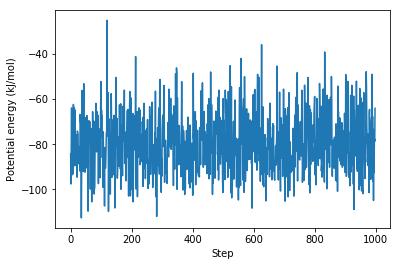

In [25]:
# Plot potential energies
# Time series
plt.plot(pe_list)
plt.xlabel('Step')
plt.ylabel('Potential energy (kJ/mol)')

Text(0.5,0,'Potential energy (kJ/mol)')

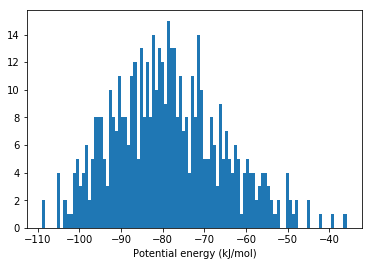

In [26]:
# Histgram
plt.hist(pe_list[500:], bins=100)
plt.xlabel('Potential energy (kJ/mol)')

In [27]:
# Plot ramachandran plot
print(traj[500:])
print(set(res.name for res in traj.top.residues))

pytraj.Trajectory, 500 frames: 
Size: 0.000246 (GB)
<Topology: 22 atoms, 3 residues, 1 mols, non-PBC>
           
{'NME', 'ALA', 'ACE'}


In [28]:
phi, psi = pt.multidihedral(traj[500:], resrange=[1], dihedral_types='psi phi')
phi, psi

(<pytraj.array.DataArray: size=500, key=phi:2, dtype=float64, ndim=1> 
 values:
 [ -81.71021969  -58.82840616 -131.80255776 ...  -88.21457539  -83.38303873
   -65.83903761],
 <pytraj.array.DataArray: size=500, key=psi:2, dtype=float64, ndim=1> 
 values:
 [-31.19548495 151.12995483 167.51337443 ... 169.93841213  -8.12753906
  -24.57465773])

(-180, 180)

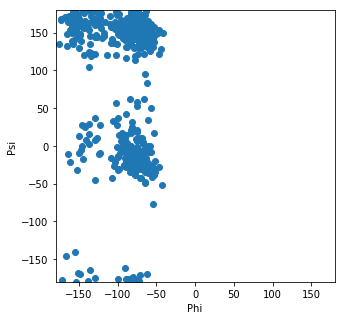

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(phi, psi)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.xlim(-180, 180)
plt.ylim(-180, 180)